## Data Analysis on Financial Data for 10-K filings on 3 companies (Microsoft, Tesla and Apple).

In [2]:
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Forage/Company data.csv'  # Replace with your actual file path
try:
  df = pd.read_csv(file_path)
  print(df.head()) # Print the first few rows to verify
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
  print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Company Name  Year  Revenue  Net Income  Operating CF  Assets  Liabilities
0    Microsoft  2022   198270       72738         89035  364840       198298
1    Microsoft  2023   211915       72361         87582  411976       205753
2    Microsoft  2024   245122       88136        118548  512163       243686
3        Tesla  2022    81462       12587         14724   82338        36440
4        Tesla  2023    96773       14974         13256  106618        43009


### Create a percentage change analysis of Revenue, Net Worth and Operating Cash Flow

In [8]:
df['Revenue Growth (%)'] = df.groupby(['Company Name'])['Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company Name'])['Net Income'].pct_change() * 100
df['Operating Cash Flow (%)'] = df.groupby(['Company Name'])['Net Income'].pct_change() * 100

In [9]:
df

,Company Name,Year,Revenue,Net Income,Operating CF,Assets,Liabilities,Revenue Growth (%),Net Income Growth (%),Operating Cash Flow (%)
0,Microsoft,2022,198270,72738,89035,364840,198298,NaN,NaN,NaN
1,Microsoft,2023,211915,72361,87582,411976,205753,6.882030,-0.518299,-0.518299
2,Microsoft,2024,245122,88136,118548,512163,243686,15.669962,21.800417,21.800417
3,Tesla,2022,81462,12587,14724,82338,36440,NaN,NaN,NaN
4,Tesla,2023,96773,14974,13256,106618,43009,18.795267,18.964010,18.964010
5,Tesla,2024,97690,7153,14923,122070,48390,0.947578,-52.230533,-52.230533
6,Apple,2022,394328,99803,122151,352755,302083,NaN,NaN,NaN
7,Apple,2023,383285,96995,110543,352583,145308,-2.800461,-2.813543,-2.813543
8,Apple,2024,391035,93736,118254,364980,176392,2.021994,-3.359967,-3.359967


#### Plot the metrics - Revenue, Net Income and Operating Cash Flow

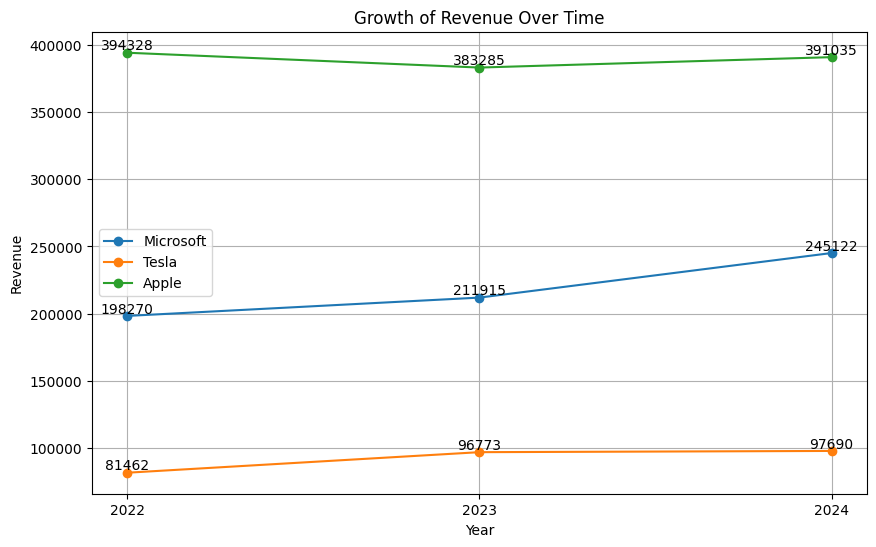

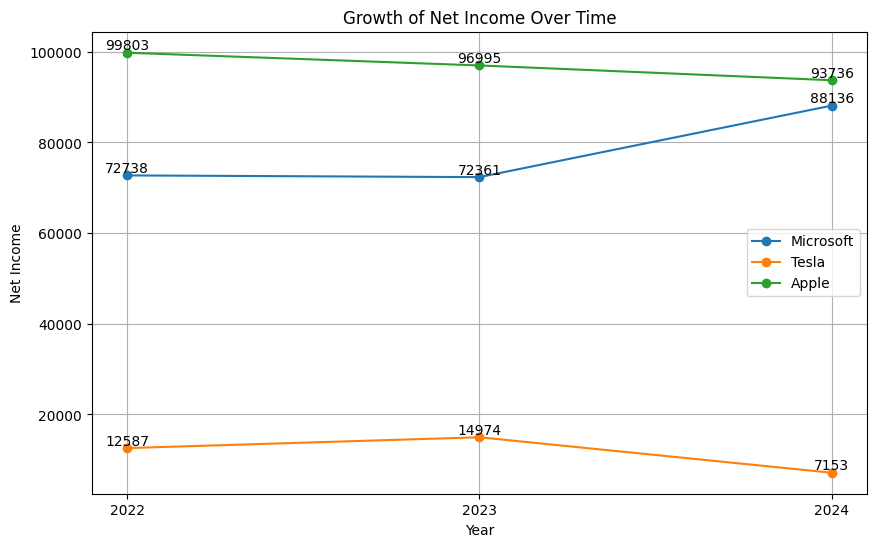

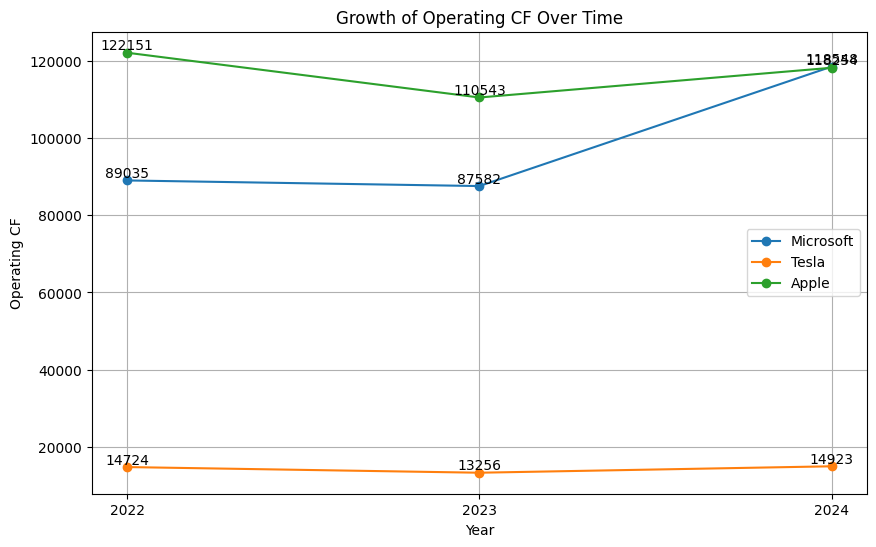

In [20]:
import matplotlib.pyplot as plt

# Assuming 'Year' is a column in your DataFrame
# and you have already calculated the percentage changes as shown in your provided code.

# Function to create growth plots for individual metrics
def create_growth_plot(df, metric):
    plt.figure(figsize=(10, 6))
    for company in df['Company Name'].unique():
        company_data = df[df['Company Name'] == company]
        plt.plot(company_data['Year'], company_data[metric], marker='o', label=company)
        # Add data labels
        for x, y in zip(company_data['Year'], company_data[metric]):
            plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')

    plt.xlabel('Year')  # Single x-axis label
    plt.ylabel(metric)
    plt.title(f'Growth of {metric} Over Time')
    plt.xticks(df['Year'].unique()) # Show all unique year values on x-axis
    plt.legend()
    plt.grid(True)
    plt.show()


# Create plots for each metric
metrics = ['Revenue', 'Net Income', 'Operating CF']
for metric in metrics:
    create_growth_plot(df, metric)



Correlation Matrix:
               Revenue  Net Income  Operating CF
Revenue       1.000000    0.920127      0.900862
Net Income    0.920127    1.000000      0.993137
Operating CF  0.900862    0.993137      1.000000


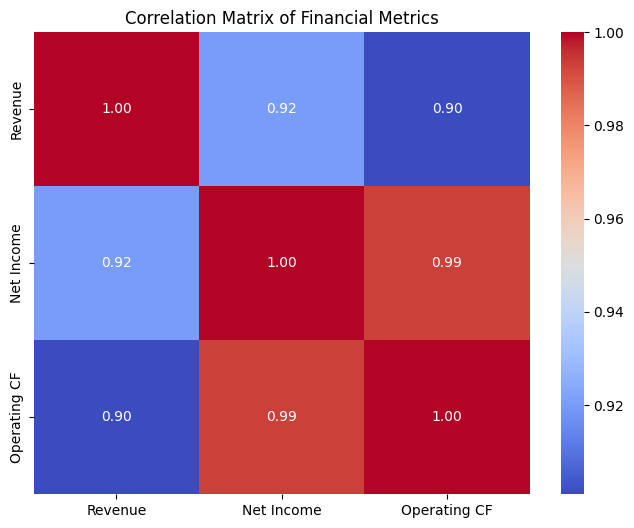



-------------------------------------------------------------------


Company Name                Apple      Microsoft         Tesla
Revenue      count       3.000000       3.000000      3.000000
             mean   389549.333333  218435.666667  91975.000000
             std      5669.423810   24097.028786   9116.062692
             min    383285.000000  198270.000000  81462.000000
             25%    387160.000000  205092.500000  89117.500000
             50%    391035.000000  211915.000000  96773.000000
             75%    392681.500000  228518.500000  97231.500000
             max    394328.000000  245122.000000  97690.000000
Net Income   count       3.000000       3.000000      3.000000
             mean    96844.666667   77745.000000  11571.333333
             std      3036.292531    9000.844016   4008.203380
             min     93736.000000   72361.000000   7153.000000
             25%     95365.500000   72549.500000   9870.000000
             50%     96995.000000   72738.0000

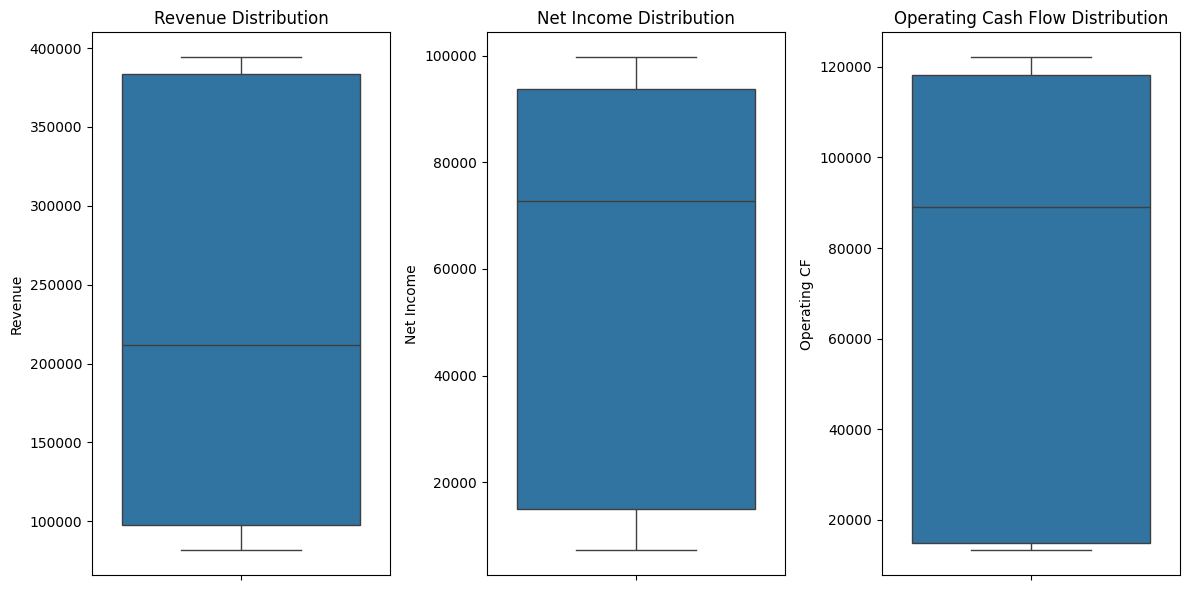



-------------------------------------------------------------------



Average Financial Performance by Company:
                    Revenue    Net Income   Operating CF
Company Name                                            
Apple         389549.333333  96844.666667  116982.666667
Microsoft     218435.666667  77745.000000   98388.333333
Tesla          91975.000000  11571.333333   14301.000000


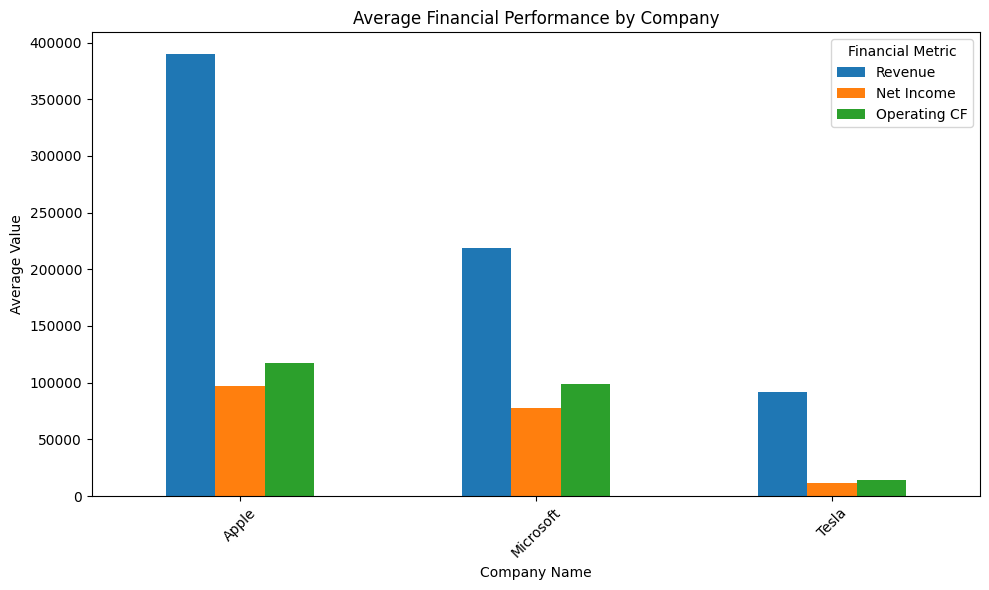

In [30]:
# Correlation Analysis
correlation_matrix = df[['Revenue', 'Net Income', 'Operating CF']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Metrics')
plt.show()

print("\n\n-------------------------------------------------------------------\n\n")

# Descriptive Statistics
company_stats = df[['Revenue', 'Net Income', 'Operating CF','Company Name']].groupby('Company Name').describe()
company_stats = company_stats.transpose()
print(company_stats)

print("\n\n-------------------------------------------------------------------\n\n")

# Box Plots to visualize the distribution and identify outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Revenue'])
plt.title('Revenue Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Net Income'])
plt.title('Net Income Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Operating CF'])
plt.title('Operating Cash Flow Distribution')

plt.tight_layout()
plt.show()

print("\n\n-------------------------------------------------------------------\n\n")

# Calculate and visualize the average revenue, net income, and operating cash flow for each company.
average_financials = df.groupby('Company Name')[['Revenue', 'Net Income', 'Operating CF']].mean()
print("\nAverage Financial Performance by Company:")
print(average_financials)

average_financials.plot(kind='bar', figsize=(10, 6))
plt.title('Average Financial Performance by Company')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Financial Metric')
plt.tight_layout()
plt.show()


The provided code performs several analyses on financial data (Revenue, Net Income, Operating Cash Flow) for different companies over time. Here's a breakdown of the inferences we can draw from each part of the analysis:


**1. Growth Plots:**

* **Trend Identification:**  The growth plots show the year-over-year change in revenue, net income, and operating cash flow for each company. We can visually identify companies with consistent growth, declining performance, or volatile financial metrics.
* **Company Comparison:**  Comparing the lines for different companies on the same plot reveals which companies are performing better or worse relative to one another in terms of each financial metric.
* **Outlier Detection:**  Significant jumps or dips in the plots could indicate one-time events (e.g., acquisitions, market downturns) or errors in the data.


**2. Correlation Matrix and Heatmap:**

* **Relationship between Metrics:**  The correlation matrix and heatmap show the statistical relationships between revenue, net income, and operating cash flow. A high positive correlation suggests that as one metric increases, the others tend to increase as well. A negative correlation indicates an inverse relationship.
* **Strength of Relationship:** The values in the correlation matrix (-1 to 1) and the color intensity in the heatmap indicate the strength of the correlation.


**3. Descriptive Statistics:**

* **Central Tendency and Dispersion:** The descriptive statistics (mean, standard deviation, min, max, quartiles) provide a summary of the distribution of each financial metric for each company.  This tells us the typical values and the extent of variation around those values.
* **Identifying Outliers:**  The minimum and maximum values, as well as the quartiles, help in identifying potential outliers within the data.


**4. Box Plots:**

* **Data Distribution:** Box plots visually represent the distribution of revenue, net income, and operating cash flow, showing the median, quartiles, and potential outliers.  This provides an at-a-glance understanding of the spread and skewness of each metric's data.
* **Outlier Detection:** Box plots are excellent tools for spotting outliers, which can signal unusual events or data errors.


**5. Average Financial Performance:**

* **Company Rankings:**  The average values provide a single metric for comparing the overall financial performance of the companies, based on mean revenue, net income, and operating cash flow.
* **Performance Benchmarks:** We can establish benchmarks of performance using the average values.


**Overall Inferences**

* **Financial Health:** Combining these analyses, we can form a comprehensive view of each company's financial health, identifying strengths and weaknesses. For example, a company with high revenue growth but low net income may have high operating expenses.
* **Investment Decisions:** This information can be crucial for investment decisions. A company demonstrating consistent growth in key metrics is likely to be a more attractive investment than one showing decline or volatility.
* **Business Strategies:** By examining trends and relationships, we can infer insights about a company's business strategies and their effectiveness. For example, if operating cash flow is consistently lower than net income, it may indicate difficulties in collecting receivables.





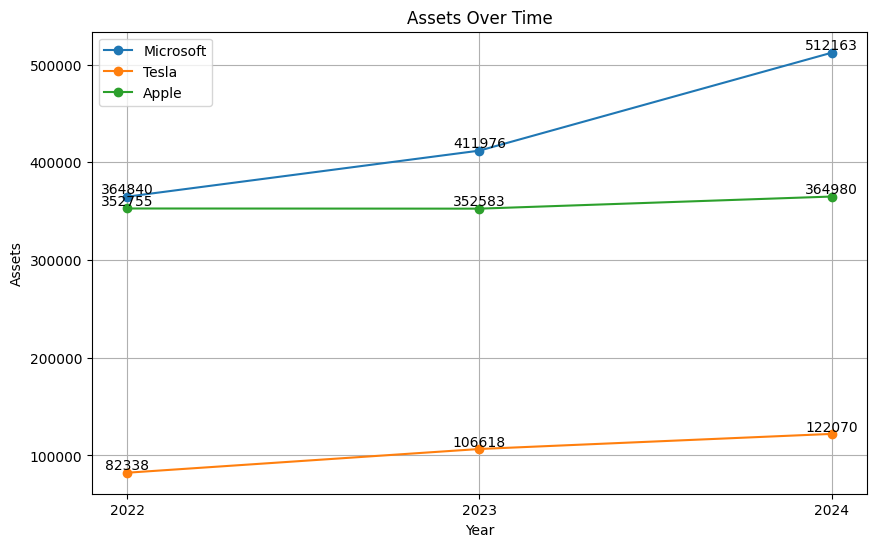

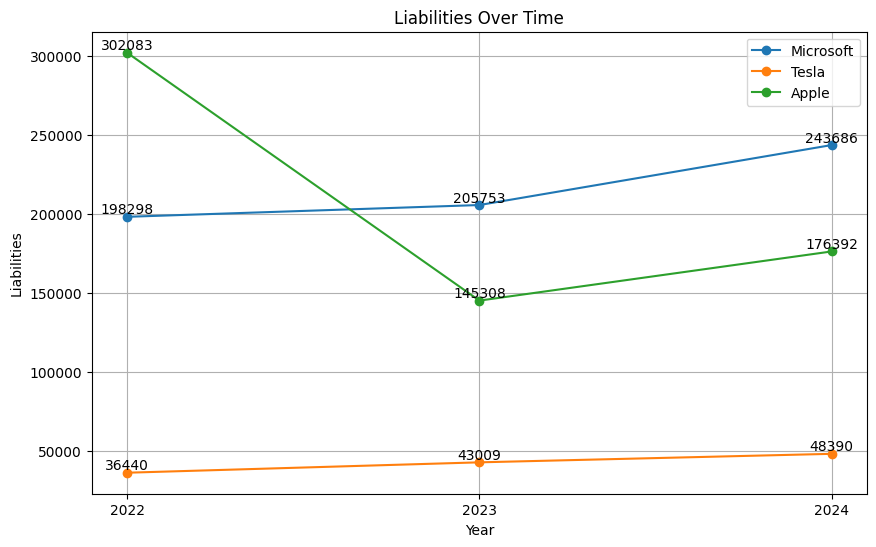


Average Balance Sheet Items by Company:
                     Assets    Liabilities
Company Name                              
Apple         356772.666667  207927.666667
Microsoft     429659.666667  215912.333333
Tesla         103675.333333   42613.000000


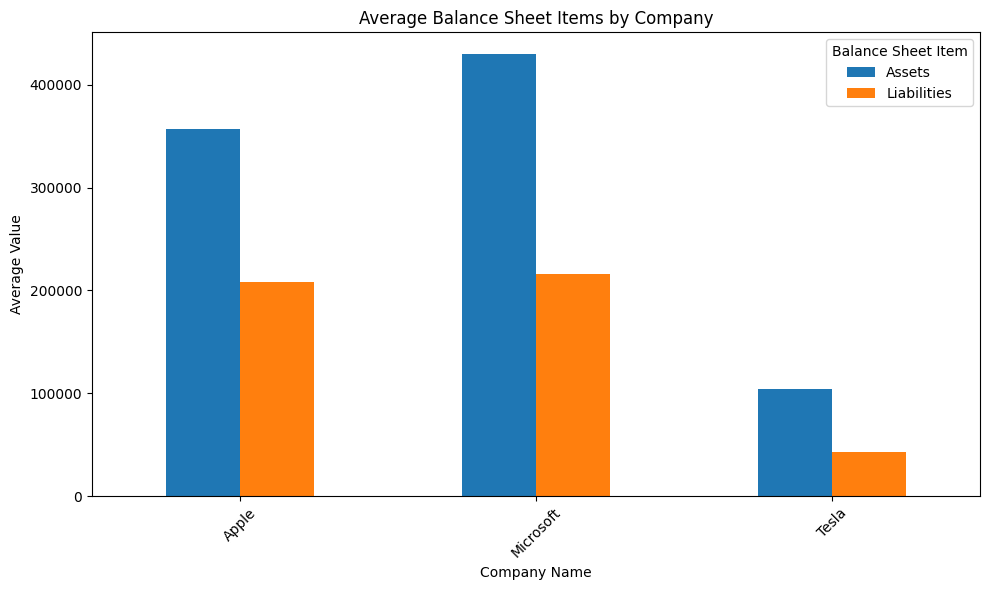


Expanded Correlation Matrix:
               Revenue  Net Income  Operating CF    Assets  Liabilities
Revenue       1.000000    0.920127      0.900862  0.677974     0.725367
Net Income    0.920127    1.000000      0.993137  0.895250     0.879517
Operating CF  0.900862    0.993137      1.000000  0.921293     0.900130
Assets        0.677974    0.895250      0.921293  1.000000     0.877594
Liabilities   0.725367    0.879517      0.900130  0.877594     1.000000


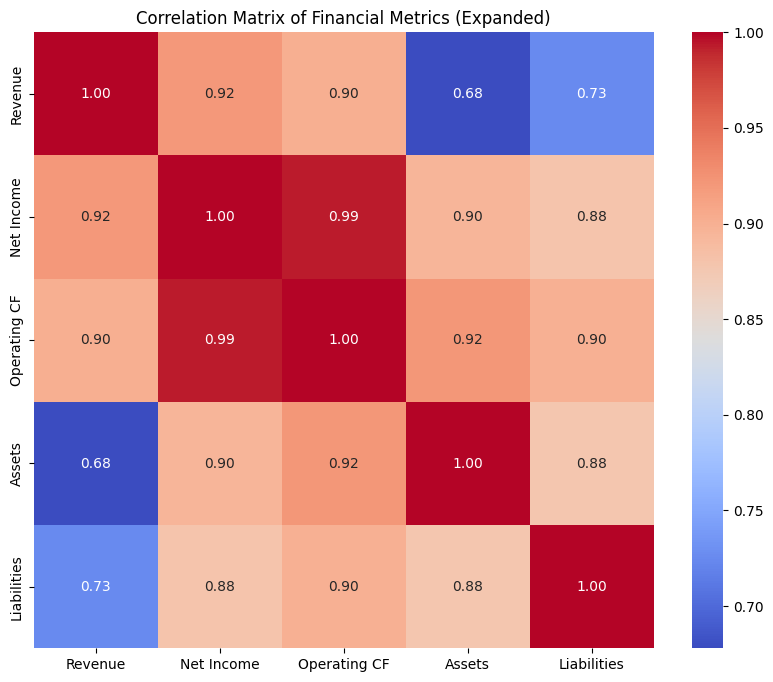

Company Name                Apple      Microsoft          Tesla
Revenue      count       3.000000       3.000000       3.000000
             mean   389549.333333  218435.666667   91975.000000
             std      5669.423810   24097.028786    9116.062692
             min    383285.000000  198270.000000   81462.000000
             25%    387160.000000  205092.500000   89117.500000
             50%    391035.000000  211915.000000   96773.000000
             75%    392681.500000  228518.500000   97231.500000
             max    394328.000000  245122.000000   97690.000000
Net Income   count       3.000000       3.000000       3.000000
             mean    96844.666667   77745.000000   11571.333333
             std      3036.292531    9000.844016    4008.203380
             min     93736.000000   72361.000000    7153.000000
             25%     95365.500000   72549.500000    9870.000000
             50%     96995.000000   72738.000000   12587.000000
             75%     98399.000000   8043

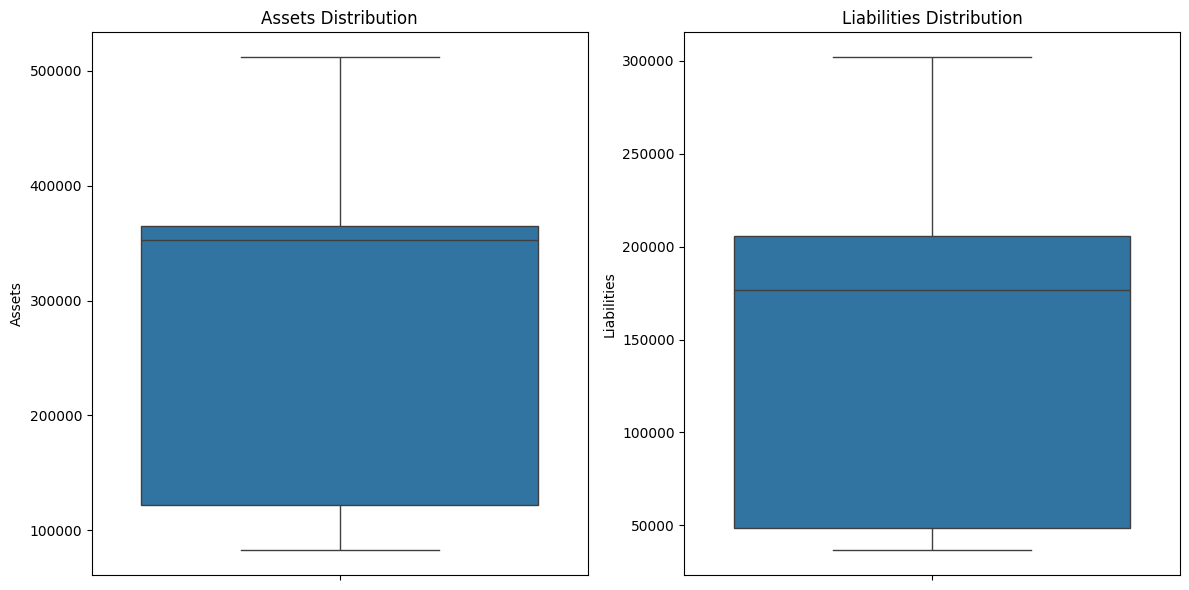

In [31]:
# Function to create plots for Assets and Liabilities
def create_balance_sheet_plot(df, metric):
    plt.figure(figsize=(10, 6))
    for company in df['Company Name'].unique():
        company_data = df[df['Company Name'] == company]
        plt.plot(company_data['Year'], company_data[metric], marker='o', label=company)
        # Add data labels
        for x, y in zip(company_data['Year'], company_data[metric]):
            plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')

    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.title(f'{metric} Over Time')
    plt.xticks(df['Year'].unique())
    plt.legend()
    plt.grid(True)
    plt.show()

# Create plots for Assets and Liabilities
create_balance_sheet_plot(df, 'Assets')
create_balance_sheet_plot(df, 'Liabilities')


# Calculate and visualize the average assets and liabilities for each company.
average_balance_sheet = df.groupby('Company Name')[['Assets', 'Liabilities']].mean()
print("\nAverage Balance Sheet Items by Company:")
print(average_balance_sheet)

average_balance_sheet.plot(kind='bar', figsize=(10, 6))
plt.title('Average Balance Sheet Items by Company')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Balance Sheet Item')
plt.tight_layout()
plt.show()

# Correlation analysis including Assets and Liabilities
correlation_matrix_expanded = df[['Revenue', 'Net Income', 'Operating CF', 'Assets', 'Liabilities']].corr()
print("\nExpanded Correlation Matrix:")
print(correlation_matrix_expanded)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_expanded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Metrics (Expanded)')
plt.show()


# Descriptive Statistics including Assets and Liabilities
company_stats_expanded = df[['Revenue', 'Net Income', 'Operating CF', 'Assets', 'Liabilities', 'Company Name']].groupby('Company Name').describe()
company_stats_expanded = company_stats_expanded.transpose()
print(company_stats_expanded)


# Box plots for Assets and Liabilities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Assets'])
plt.title('Assets Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Liabilities'])
plt.title('Liabilities Distribution')

plt.tight_layout()
plt.show()


### Further Analytics on Asets and Liabilities

**Solvency and Financial Risk:**

* **Debt-to-Asset Ratio:**  Calculate the debt-to-asset ratio (Liabilities / Assets) for each company. A high ratio indicates higher financial risk, as a larger proportion of assets are financed by debt.
* **Asset Turnover:**  Analyze the asset turnover ratio (Revenue / Assets) to understand how efficiently a company utilizes its assets to generate revenue. A higher ratio generally suggests better asset utilization.
* **Liability Trends:**  Monitor the trends in liabilities over time.  Rapidly increasing liabilities, especially short-term debt, can be a red flag.

**Profitability and Efficiency:**

* **Return on Assets (ROA):** Calculate ROA (Net Income / Assets) to see how effectively a company uses its assets to generate profits.  A higher ROA suggests better profitability.

**Combined Analysis:**

* **Growth vs. Leverage:**  Compare growth rates (revenue, net income) with the debt-to-asset ratio. Is growth being fueled by excessive debt, or is it sustainable?
* **Liquidity and Solvency:** Analyze the relationship between operating cash flow, assets, and liabilities.  Sufficient operating cash flow is essential to meet short-term obligations and fund future growth.  Low cash flow combined with high liabilities can indicate financial distress.



Debt-to-Asset Ratio:
  Company Name  Year  Debt-to-Asset Ratio
0    Microsoft  2022             0.543520
1    Microsoft  2023             0.499430
2    Microsoft  2024             0.475798
3        Tesla  2022             0.442566
4        Tesla  2023             0.403393
5        Tesla  2024             0.396412
6        Apple  2022             0.856354
7        Apple  2023             0.412124
8        Apple  2024             0.483292


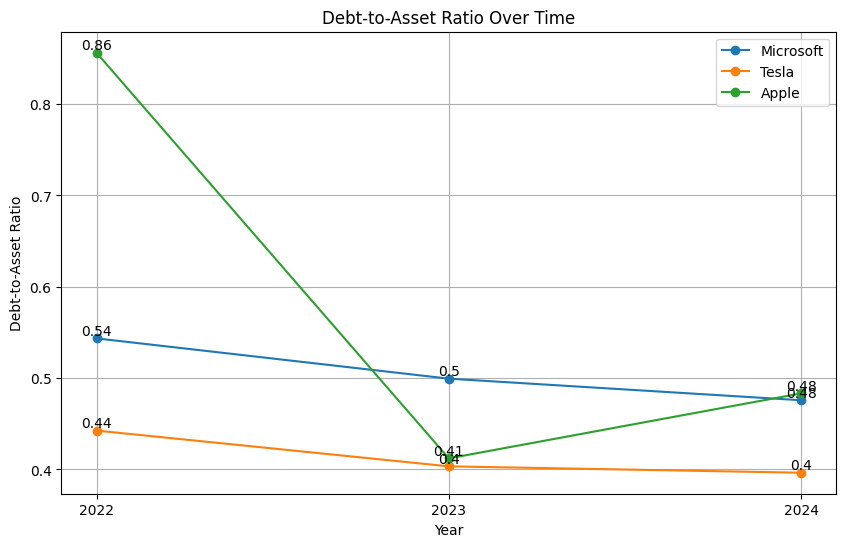

In [32]:
# Further analysis incorporating Assets and Liabilities:
# Example of calculating and displaying debt-to-asset ratio:
df['Debt-to-Asset Ratio'] = df['Liabilities'] / df['Assets']
print("\nDebt-to-Asset Ratio:")
print(df[['Company Name', 'Year', 'Debt-to-Asset Ratio']])


# Visualization for Debt-to-Asset Ratio
create_balance_sheet_plot(df, 'Debt-to-Asset Ratio')

